In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

crypto_tickers = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'ADA-USD', 'XRP-USD', 'SOL-USD', 'DOT-USD', 'DOGE-USD', 'LTC-USD', 'AVAX-USD']

crypto_data = {}
for ticker in crypto_tickers:
    data = yf.download(ticker, start='2018-01-01', end='2024-01-01')
    crypto_data[ticker] = data


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
def calculate_RSI(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


def sharpe_ratio(returns, risk_free_rate=0):
    return (returns.mean() - risk_free_rate) / returns.std()


def max_drawdown(returns):
    cumulative = (1 + returns).cumprod()
    peak = cumulative.expanding(min_periods=1).max()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()

In [6]:
for ticker in crypto_tickers:
    print(f"\nProcessing {ticker}...")  
    
 
    crypto_data[ticker]['Short_MA'] = crypto_data[ticker]['Close'].rolling(window=20).mean()
    crypto_data[ticker]['Long_MA'] = crypto_data[ticker]['Close'].rolling(window=50).mean()
   
    crypto_data[ticker]['Momentum_Signal'] = 0
    crypto_data[ticker]['Momentum_Signal'][20:] = [
        1 if crypto_data[ticker]['Short_MA'][i] > crypto_data[ticker]['Long_MA'][i] else 0
        for i in range(20, len(crypto_data[ticker]))
    ]

   
    crypto_data[ticker]['RSI'] = calculate_RSI(crypto_data[ticker])
    crypto_data[ticker]['Reversal_Signal'] = 0
    crypto_data[ticker]['Reversal_Signal'][crypto_data[ticker]['RSI'] < 30] = 1  # Buy signal (oversold)
    crypto_data[ticker]['Reversal_Signal'][crypto_data[ticker]['RSI'] > 70] = -1  # Sell signal (overbought)

  
    crypto_data[ticker]['Position'] = crypto_data[ticker]['Momentum_Signal'].shift(1)
    crypto_data[ticker]['Strategy_Returns'] = crypto_data[ticker]['Position'] * crypto_data[ticker]['Close'].pct_change()
    crypto_data[ticker]['Cumulative_Strategy_Returns'] = (1 + crypto_data[ticker]['Strategy_Returns']).cumprod()

    crypto_data[ticker]['Position_Reversal'] = crypto_data[ticker]['Reversal_Signal'].shift(1)
    crypto_data[ticker]['Reversal_Strategy_Returns'] = crypto_data[ticker]['Position_Reversal'] * crypto_data[ticker]['Close'].pct_change()
    crypto_data[ticker]['Cumulative_Reversal_Returns'] = (1 + crypto_data[ticker]['Reversal_Strategy_Returns']).cumprod()


    sharpe_momentum = sharpe_ratio(crypto_data[ticker]['Strategy_Returns'])
    sharpe_reversal = sharpe_ratio(crypto_data[ticker]['Reversal_Strategy_Returns'])

    
    max_drawdown_momentum = max_drawdown(crypto_data[ticker]['Strategy_Returns'])
    max_drawdown_reversal = max_drawdown(crypto_data[ticker]['Reversal_Strategy_Returns'])

    print(f"{ticker} - Momentum Strategy: Sharpe Ratio = {sharpe_momentum:.4f}, Max Drawdown = {max_drawdown_momentum:.4f}")
    print(f"{ticker} - Reversal Strategy: Sharpe Ratio = {sharpe_reversal:.4f}, Max Drawdown = {max_drawdown_reversal:.4f}")



Processing BTC-USD...
BTC-USD - Momentum Strategy: Sharpe Ratio = 0.0422, Max Drawdown = -0.5788
BTC-USD - Reversal Strategy: Sharpe Ratio = -0.0352, Max Drawdown = -0.9315

Processing ETH-USD...
ETH-USD - Momentum Strategy: Sharpe Ratio = 0.0484, Max Drawdown = -0.6078
ETH-USD - Reversal Strategy: Sharpe Ratio = -0.0087, Max Drawdown = -0.8836

Processing BNB-USD...
BNB-USD - Momentum Strategy: Sharpe Ratio = 0.0724, Max Drawdown = -0.6108
BNB-USD - Reversal Strategy: Sharpe Ratio = -0.0156, Max Drawdown = -0.9744

Processing ADA-USD...
ADA-USD - Momentum Strategy: Sharpe Ratio = 0.0667, Max Drawdown = -0.7022
ADA-USD - Reversal Strategy: Sharpe Ratio = -0.0429, Max Drawdown = -0.9936

Processing XRP-USD...
XRP-USD - Momentum Strategy: Sharpe Ratio = 0.0104, Max Drawdown = -0.7834
XRP-USD - Reversal Strategy: Sharpe Ratio = 0.0084, Max Drawdown = -0.9019

Processing SOL-USD...
SOL-USD - Momentum Strategy: Sharpe Ratio = 0.1007, Max Drawdown = -0.6930
SOL-USD - Reversal Strategy: Shar

/var/folders/g7/x30lhj6x7jj62_g3k_xrrdz40000gn/T/ipykernel_67618/4009743198.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crypto_data[ticker]['Momentum_Signal'][20:] = [
/var/folders/g7/x30lhj6x7jj62_g3k_xrrdz40000gn/T/ipykernel_67618/4009743198.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crypto_data[ticker]['Reversal_Signal'][crypto_data[ticker]['RSI'] < 30] = 1  # Buy signal (oversold)
/var/folders/g7/x30lhj6x7jj62_g3k_xrrdz40000gn/T/ipykernel_67618/4009743198.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

In [7]:

def calculate_alpha_beta(returns, benchmark_returns):
    min_length = min(len(returns), len(benchmark_returns))
    aligned_returns = returns[:min_length]
    aligned_benchmark = benchmark_returns[:min_length]
    
    covariance_matrix = np.cov(aligned_returns, aligned_benchmark)
    beta = covariance_matrix[0, 1] / covariance_matrix[1, 1]
    alpha = aligned_returns.mean() - beta * aligned_benchmark.mean()
    
    return alpha, beta

def apply_differentiated_execution_costs(data, market_order_cost=0.0020, limit_order_cost=0.0007):
  
    total_execution_cost = 0.7 * market_order_cost + 0.3 * limit_order_cost
    data['Strategy_Returns_After_Cost'] = data['Strategy_Returns'] - total_execution_cost
    data['Reversal_Strategy_Returns_After_Cost'] = data['Reversal_Strategy_Returns'] - total_execution_cost
    return data

def combine_strategies(data):
    data['Combined_Strategy_Returns'] = (data['Strategy_Returns_After_Cost'] + data['Reversal_Strategy_Returns_After_Cost']) / 2
    data['Cumulative_Combined_Returns'] = (1 + data['Combined_Strategy_Returns']).cumprod()
    return data

benchmark_returns = np.random.normal(0, 0.01, len(crypto_data[ticker]['Close']))  

for ticker in crypto_data:
    
    crypto_data[ticker] = apply_differentiated_execution_costs(crypto_data[ticker], market_order_cost=0.0020, limit_order_cost=0.0007)

    crypto_data[ticker] = combine_strategies(crypto_data[ticker])

    sharpe_combined = sharpe_ratio(crypto_data[ticker]['Combined_Strategy_Returns'])

    max_drawdown_combined = max_drawdown(crypto_data[ticker]['Combined_Strategy_Returns'])

    volatility_combined = crypto_data[ticker]['Combined_Strategy_Returns'].std()

    alpha, beta = calculate_alpha_beta(crypto_data[ticker]['Combined_Strategy_Returns'].dropna(), benchmark_returns)

    print(f"{ticker} - Combined Strategy: Sharpe Ratio = {sharpe_combined:.4f}, Max Drawdown = {max_drawdown_combined:.4f}, Volatility = {volatility_combined:.4f}")
    print(f"{ticker} - Combined Strategy: Alpha = {alpha:.4f}, Beta = {beta:.4f}")

BTC-USD - Combined Strategy: Sharpe Ratio = -0.1057, Max Drawdown = -0.9730, Volatility = 0.0143
BTC-USD - Combined Strategy: Alpha = -0.0014, Beta = -0.0687
ETH-USD - Combined Strategy: Sharpe Ratio = -0.0465, Max Drawdown = -0.9249, Volatility = 0.0196
ETH-USD - Combined Strategy: Alpha = -0.0007, Beta = -0.1408
BNB-USD - Combined Strategy: Sharpe Ratio = -0.0219, Max Drawdown = -0.8535, Volatility = 0.0205
BNB-USD - Combined Strategy: Alpha = 0.0003, Beta = -0.0531
ADA-USD - Combined Strategy: Sharpe Ratio = -0.0541, Max Drawdown = -0.9528, Volatility = 0.0204
ADA-USD - Combined Strategy: Alpha = -0.0009, Beta = -0.1781
XRP-USD - Combined Strategy: Sharpe Ratio = -0.0601, Max Drawdown = -0.9652, Volatility = 0.0212
XRP-USD - Combined Strategy: Alpha = -0.0013, Beta = -0.1176
SOL-USD - Combined Strategy: Sharpe Ratio = 0.0127, Max Drawdown = -0.7883, Volatility = 0.0252
SOL-USD - Combined Strategy: Alpha = 0.0002, Beta = 0.1267
DOT-USD - Combined Strategy: Sharpe Ratio = -0.0066, Max

In [13]:

def optimize_parameters(data):
    best_sharpe = -np.inf
    best_params = None
    windows = [(10, 50), (20, 100), (50, 200)] 
    rsi_thresholds = [(30, 70), (25, 75), (20, 80)] 

    for short_ma, long_ma in windows:
        for rsi_low, rsi_high in rsi_thresholds:
            
            data['Short_MA'] = data['Close'].rolling(window=short_ma).mean()
            data['Long_MA'] = data['Close'].rolling(window=long_ma).mean()
            data['Momentum_Signal'] = (data['Short_MA'] > data['Long_MA']).astype(int)

            data['RSI'] = calculate_RSI(data, window=14)
            data['Reversal_Signal'] = 0
            data['Reversal_Signal'][data['RSI'] < rsi_low] = 1
            data['Reversal_Signal'][data['RSI'] > rsi_high] = -1

            data['Combined_Strategy_Returns'] = (data['Momentum_Signal'].shift(1) * data['Close'].pct_change()) +                                                 (data['Reversal_Signal'].shift(1) * data['Close'].pct_change())

            sharpe = sharpe_ratio(data['Combined_Strategy_Returns'])

            if sharpe > best_sharpe:
                best_sharpe = sharpe
                best_params = (short_ma, long_ma, rsi_low, rsi_high)

    return best_params, best_sharpe


def volatility_filter(data, threshold=0.02):
    data['Volatility'] = data['Close'].pct_change().rolling(window=20).std()
    data['Filtered_Strategy_Returns'] = data['Combined_Strategy_Returns'][data['Volatility'] > threshold]
    return data

for ticker in crypto_data:
    print(f"Optimizing parameters for {ticker}...")
    best_params, best_sharpe = optimize_parameters(crypto_data[ticker])
    print(f"Best parameters for {ticker}: Short MA = {best_params[0]}, Long MA = {best_params[1]}, RSI low = {best_params[2]}, RSI high = {best_params[3]}, Sharpe = {best_sharpe:.4f}")


    crypto_data[ticker] = volatility_filter(crypto_data[ticker])

    
    sharpe_filtered = sharpe_ratio(crypto_data[ticker]['Filtered_Strategy_Returns'].dropna())
    max_drawdown_filtered = max_drawdown(crypto_data[ticker]['Filtered_Strategy_Returns'].dropna())
    volatility_filtered = crypto_data[ticker]['Filtered_Strategy_Returns'].std()

    print(f"{ticker} - After Filter: Sharpe Ratio = {sharpe_filtered:.4f}, Max Drawdown = {max_drawdown_filtered:.4f}, Volatility = {volatility_filtered:.4f}")




Optimizing parameters for BTC-USD...
Best parameters for BTC-USD: Short MA = 10, Long MA = 50, RSI low = 20, RSI high = 80, Sharpe = 0.0400
BTC-USD - After Filter: Sharpe Ratio = 0.0320, Max Drawdown = -0.6277, Volatility = 0.0294
Optimizing parameters for ETH-USD...
Best parameters for ETH-USD: Short MA = 10, Long MA = 50, RSI low = 30, RSI high = 70, Sharpe = 0.0385
ETH-USD - After Filter: Sharpe Ratio = 0.0358, Max Drawdown = -0.7991, Volatility = 0.0372
Optimizing parameters for BNB-USD...
Best parameters for BNB-USD: Short MA = 10, Long MA = 50, RSI low = 25, RSI high = 75, Sharpe = 0.0617
BNB-USD - After Filter: Sharpe Ratio = 0.0254, Max Drawdown = -0.7432, Volatility = 0.0411
Optimizing parameters for ADA-USD...
Best parameters for ADA-USD: Short MA = 10, Long MA = 50, RSI low = 20, RSI high = 80, Sharpe = 0.0633
ADA-USD - After Filter: Sharpe Ratio = 0.0372, Max Drawdown = -0.7983, Volatility = 0.0418
Optimizing parameters for XRP-USD...
Best parameters for XRP-USD: Short MA =

/var/folders/g7/x30lhj6x7jj62_g3k_xrrdz40000gn/T/ipykernel_67618/3732435432.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Reversal_Signal'][data['RSI'] < rsi_low] = 1
/var/folders/g7/x30lhj6x7jj62_g3k_xrrdz40000gn/T/ipykernel_67618/3732435432.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Reversal_Signal'][data['RSI'] > rsi_high] = -1
/var/folders/g7/x30lhj6x7jj62_g3k_xrrdz40000gn/T/ipykernel_67618/3732435432.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

Plotting for BTC-USD...


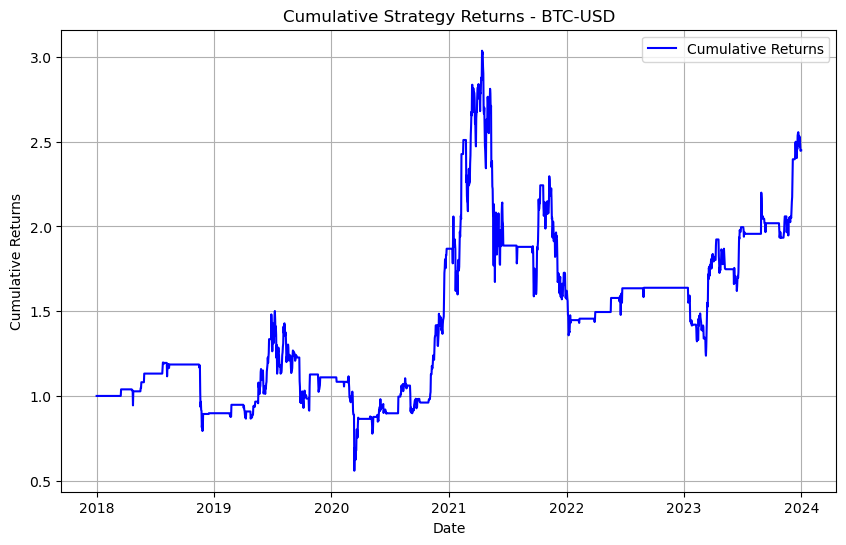

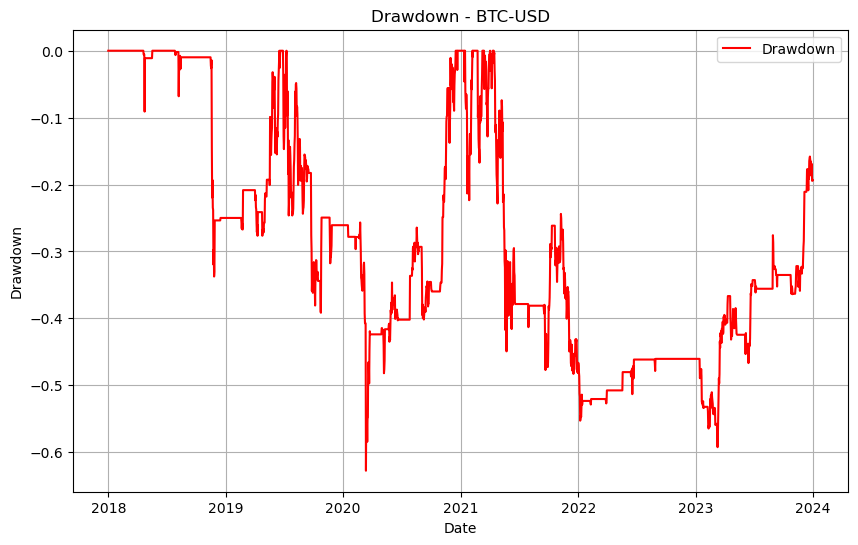

Plotting for ETH-USD...


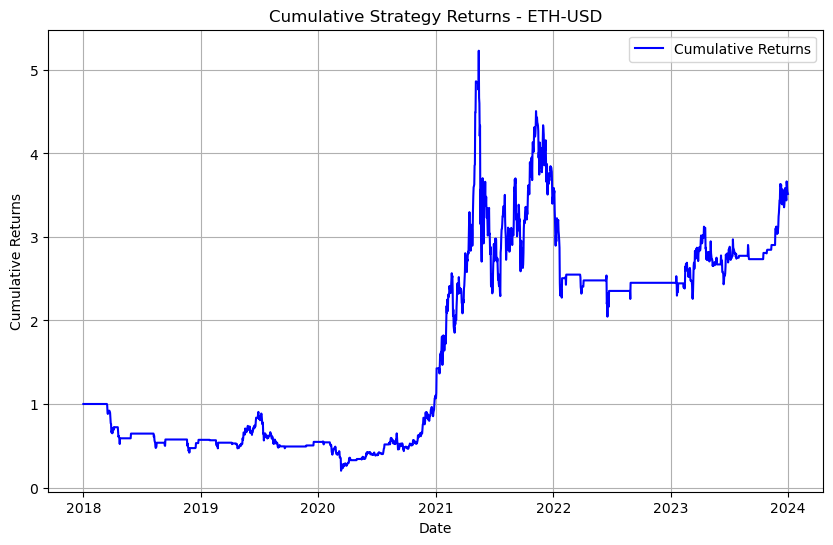

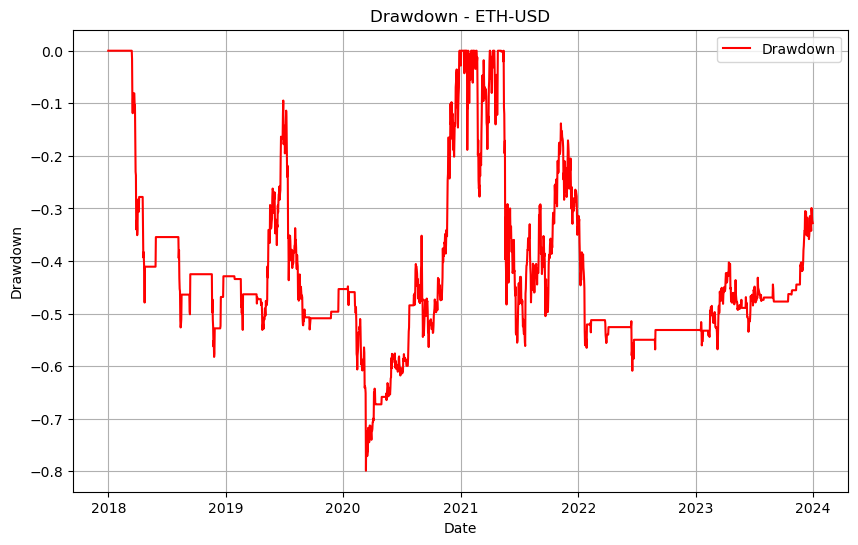

Plotting for BNB-USD...


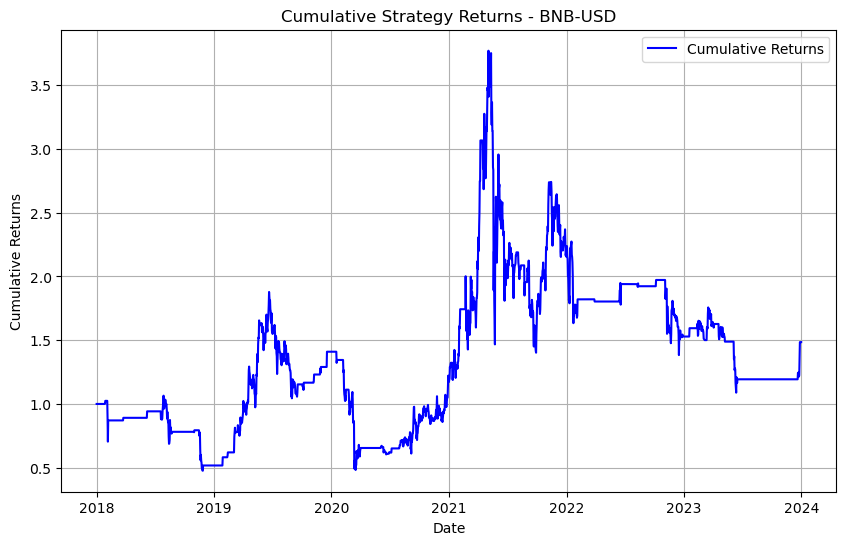

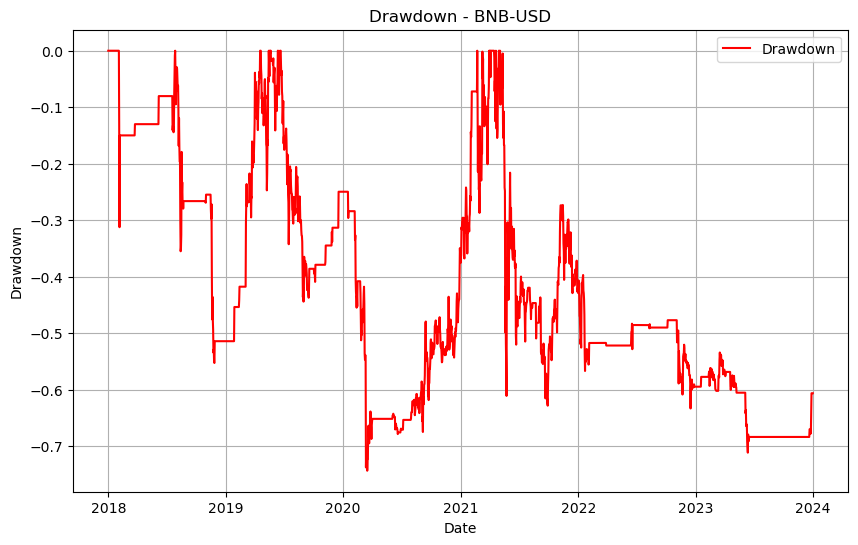

Plotting for ADA-USD...


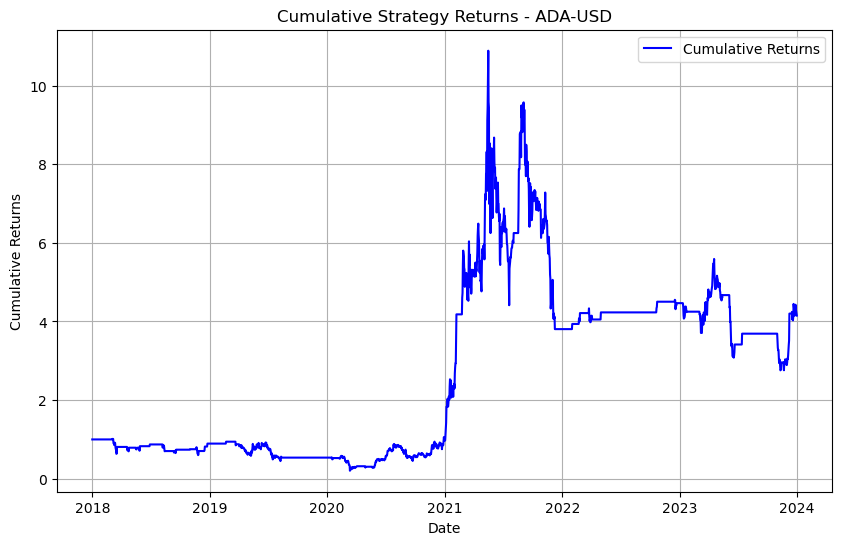

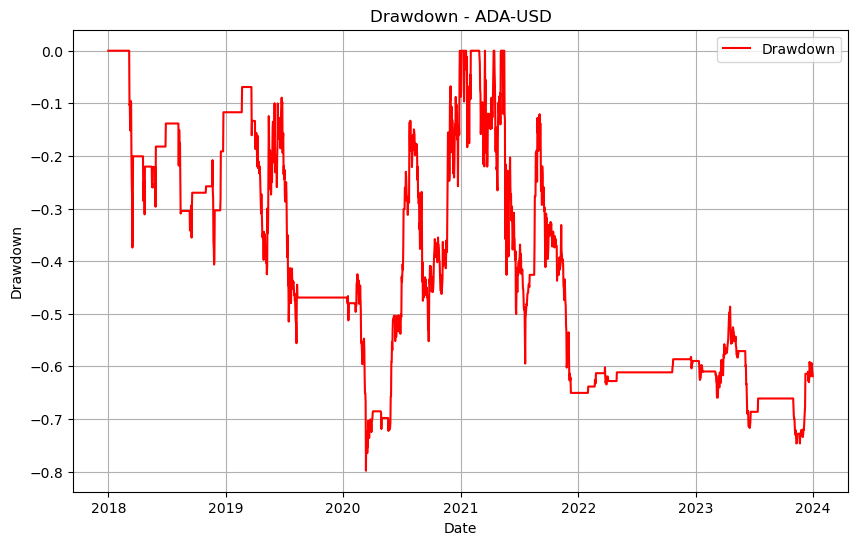

Plotting for XRP-USD...


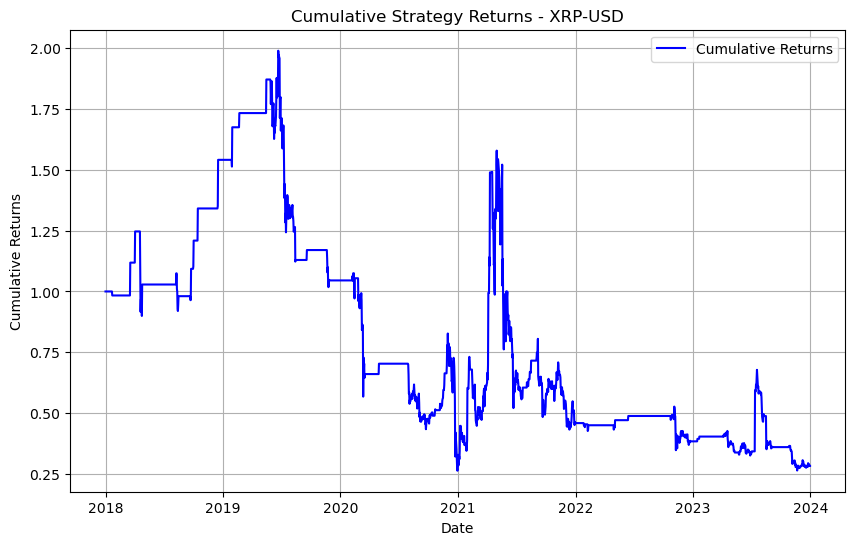

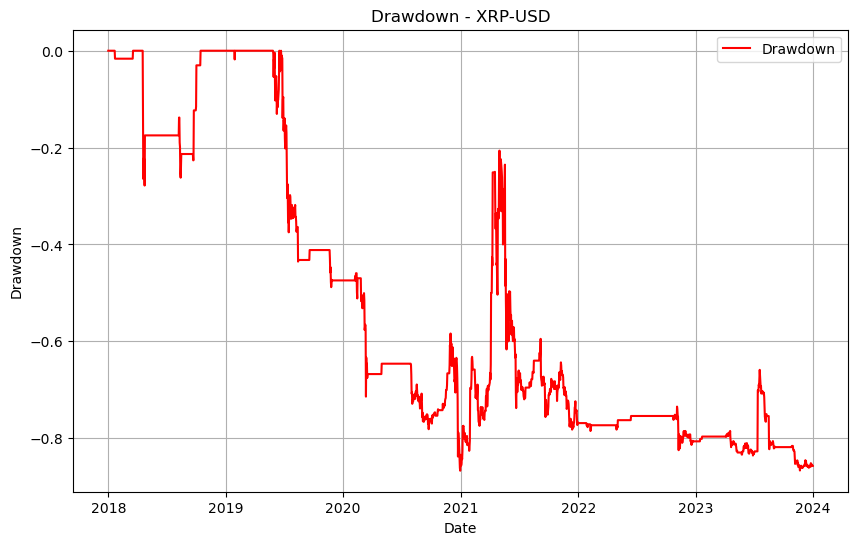

Plotting for SOL-USD...


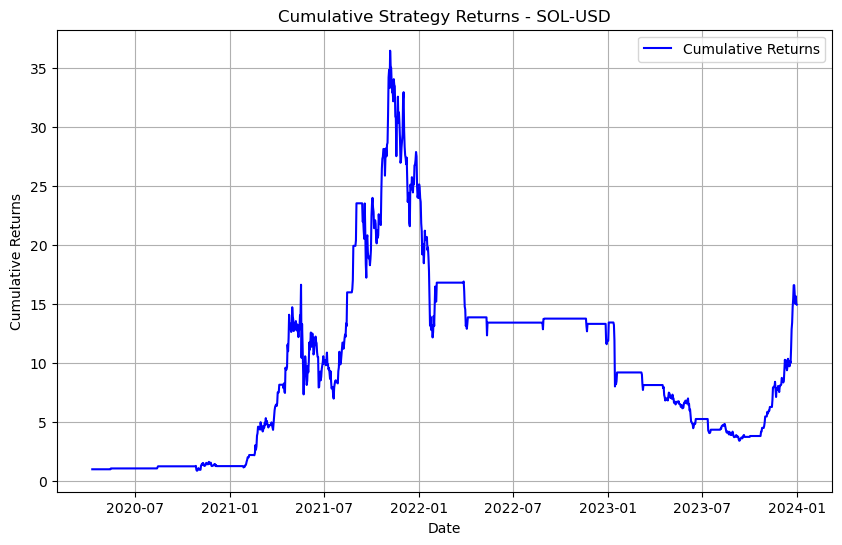

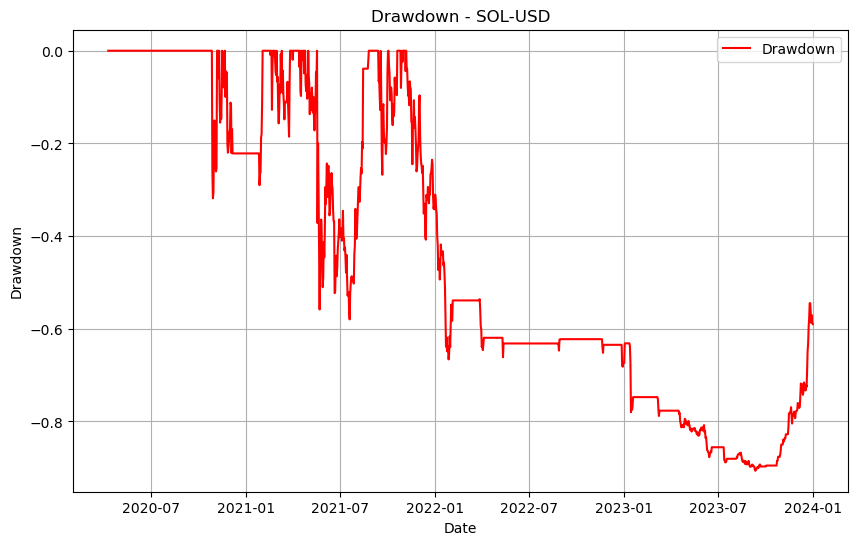

Plotting for DOT-USD...


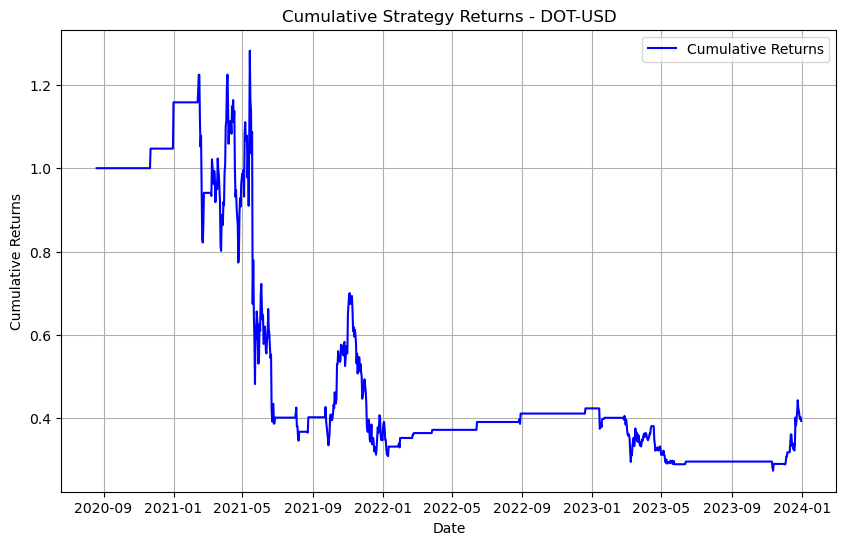

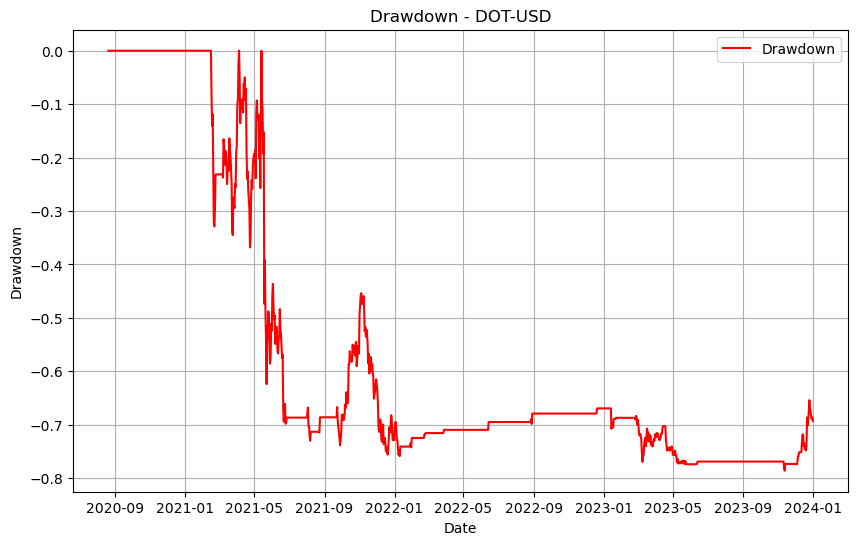

Plotting for DOGE-USD...


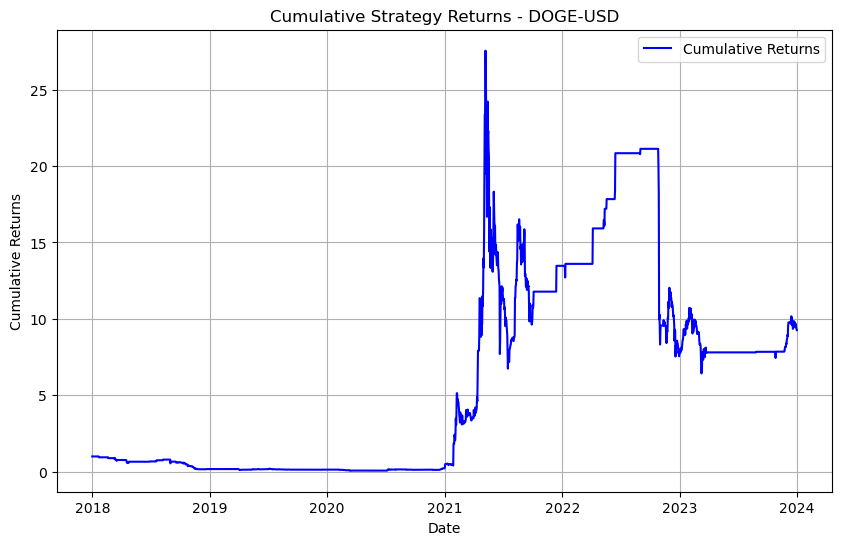

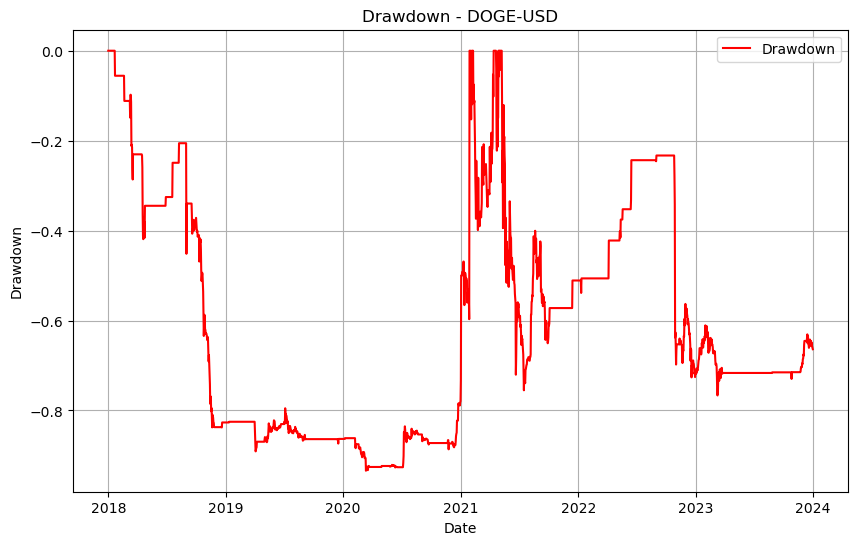

Plotting for LTC-USD...


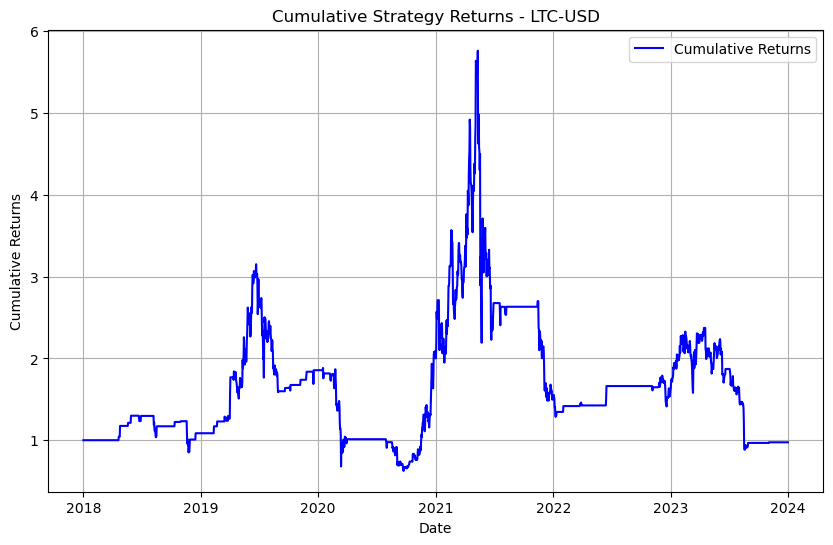

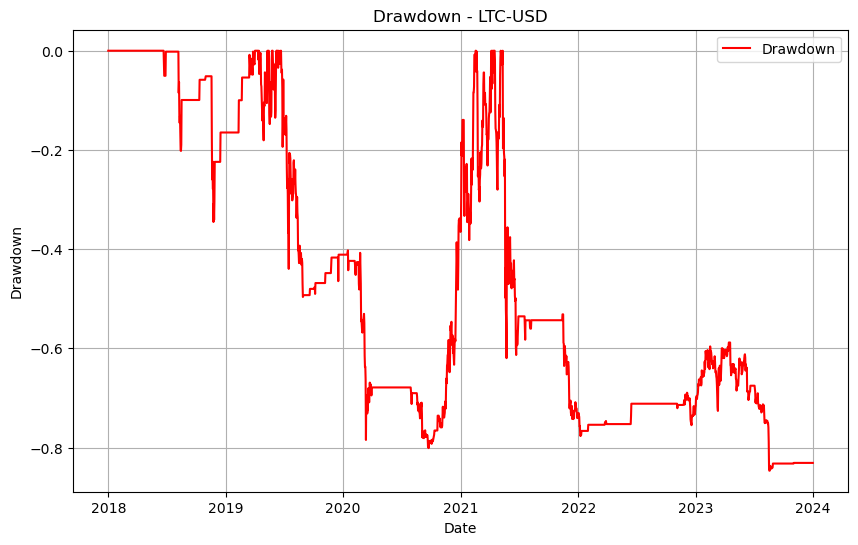

Plotting for AVAX-USD...


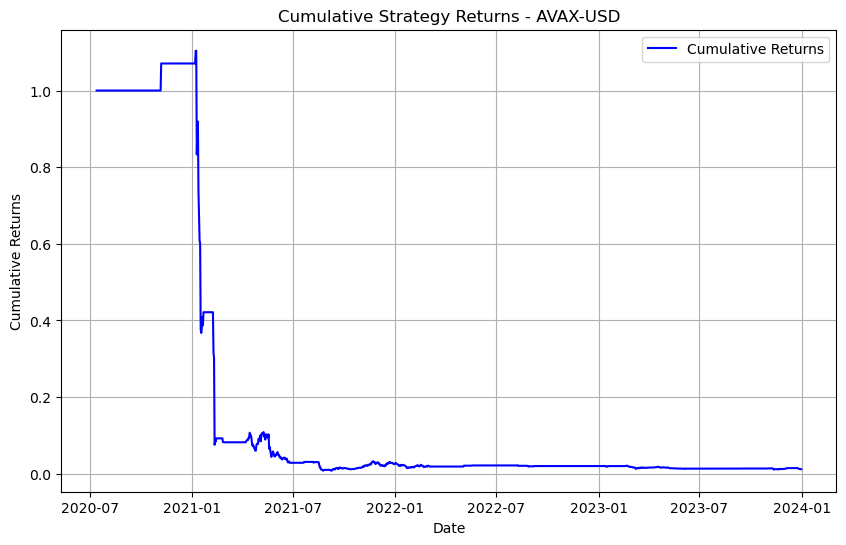

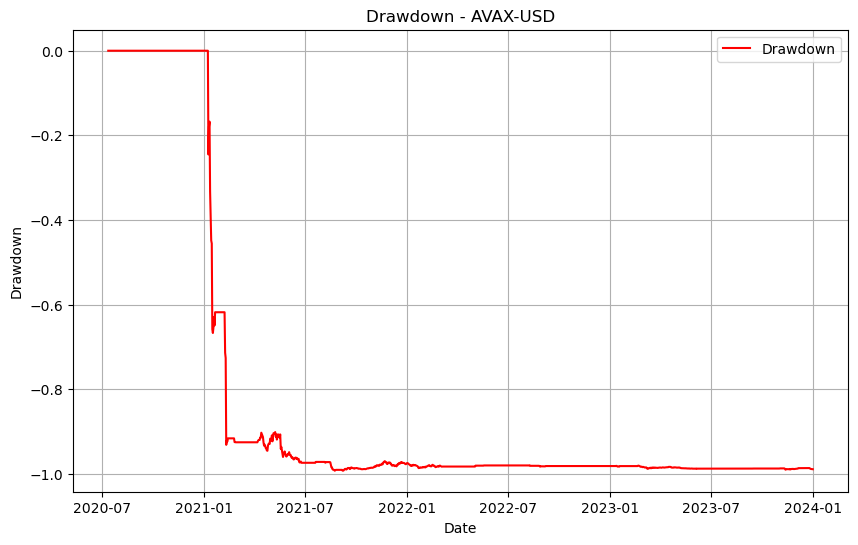

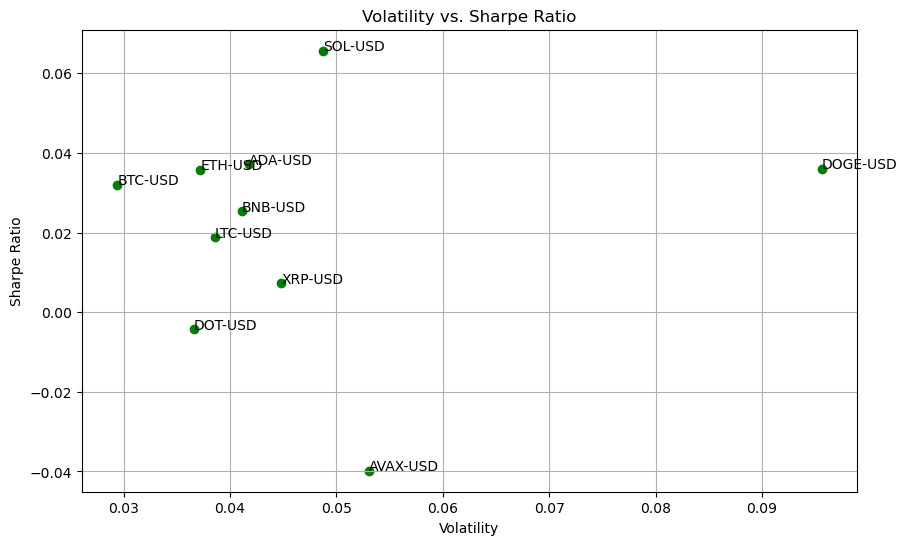

In [9]:

def plot_cumulative_returns(data, ticker):
    data['Cumulative_Strategy_Returns'] = (1 + data['Filtered_Strategy_Returns'].fillna(0)).cumprod()
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Cumulative_Strategy_Returns'], label='Cumulative Returns', color='blue')
    plt.title(f'Cumulative Strategy Returns - {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_drawdown(data, ticker):
    cumulative_returns = (1 + data['Filtered_Strategy_Returns'].fillna(0)).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, drawdown, label='Drawdown', color='red')
    plt.title(f'Drawdown - {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Drawdown')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_volatility_vs_returns(crypto_data):
    volatilities = []
    sharpes = []
    tickers = []

    for ticker in crypto_data:
        filtered_returns = crypto_data[ticker]['Filtered_Strategy_Returns'].dropna()
        volatility = filtered_returns.std()
        sharpe = sharpe_ratio(filtered_returns)
        volatilities.append(volatility)
        sharpes.append(sharpe)
        tickers.append(ticker)

    plt.figure(figsize=(10, 6))
    plt.scatter(volatilities, sharpes, color='green')
    plt.title('Volatility vs. Sharpe Ratio')
    plt.xlabel('Volatility')
    plt.ylabel('Sharpe Ratio')

    for i, ticker in enumerate(tickers):
        plt.annotate(ticker, (volatilities[i], sharpes[i]))

    plt.grid(True)
    plt.show()


for ticker in crypto_data:
    print(f"Plotting for {ticker}...")
    plot_cumulative_returns(crypto_data[ticker], ticker)
    plot_drawdown(crypto_data[ticker], ticker)


plot_volatility_vs_returns(crypto_data)
